# PyTorch Workflow

Let's explore an example of PyTorch end-to-end workflow.

In [140]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [141]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu102'

# 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Image of any kind
* Videos (Youtube has a lot of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical reperesentation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameter**.

In [142]:
 # Create *known* parameter
weight = 0.7
bias = 0.3

#create 
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [143]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and testing set with our data.

In [144]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]


len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we beter visualize our data?

This is where the data explore's motto comes in!

"Visualize, visualize, visualize"

In [145]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize = (10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data , test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predicitons if they exists
        plt.scatter(test_data, predictions, c ="r", s=4, label = "Predicitons")

    # Show the legend
    plt.legend(prop={"size": 14});
    


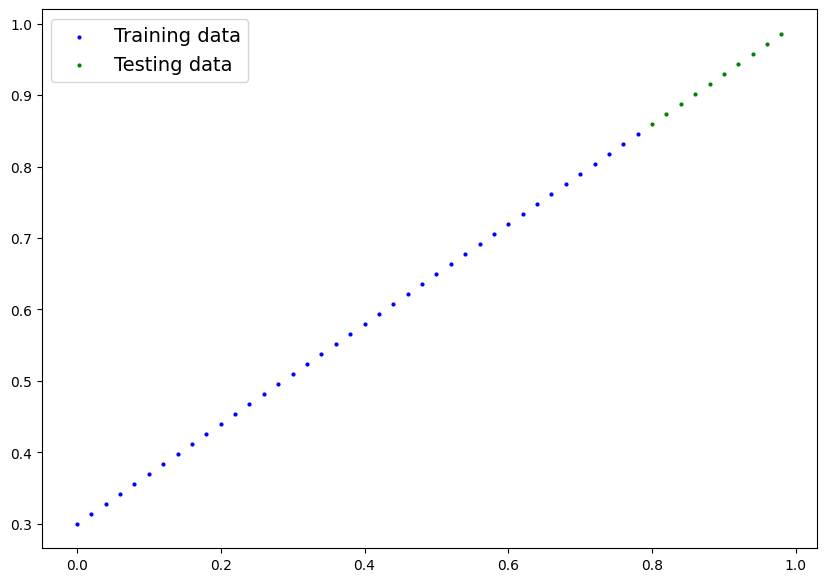

In [146]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... lets try

Because we are going to be building classes throught the course, I'd recomment getting familiar with OOP(Object oriented python) in python, to do so you can use the following resource from real python: https://realpython.com/python-classes/

What our model does:
* Start with random values ( weights and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values ( the weight & bias values we used to create the data ).

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [147]:
# Create a linear regression model class:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad = True,
                                             dtype=torch.float))
        
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
            return self.weights * x+ self.bias # this is the linear regression formula
        

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent  
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [148]:
torch.randn(1)

tensor([0.3367])

### Checking the contents of out PyTorch model

Now that we've created a model, let's see what's inside...

So we can check our model parameters or what's inside out model using `.parameters()`.

In [149]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()


# Check out the parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [150]:
# List the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

* Note - the premise of deep learning is to start with random values and make them more representative and closer to the ideal values.

In [151]:
weight, bias

(0.7, 0.3)

### Making pridictions using ` torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

when we pass data through our model, it is going to run it through the `forward()` method.

In [152]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [153]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [154]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# We can also use `torch.no_grad` to achieve the same thing, but `torch.inference_mode` is more readable and more prefered.
''' with torch.no_grad():
    y_preds = model_0(X_test) '''

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [155]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

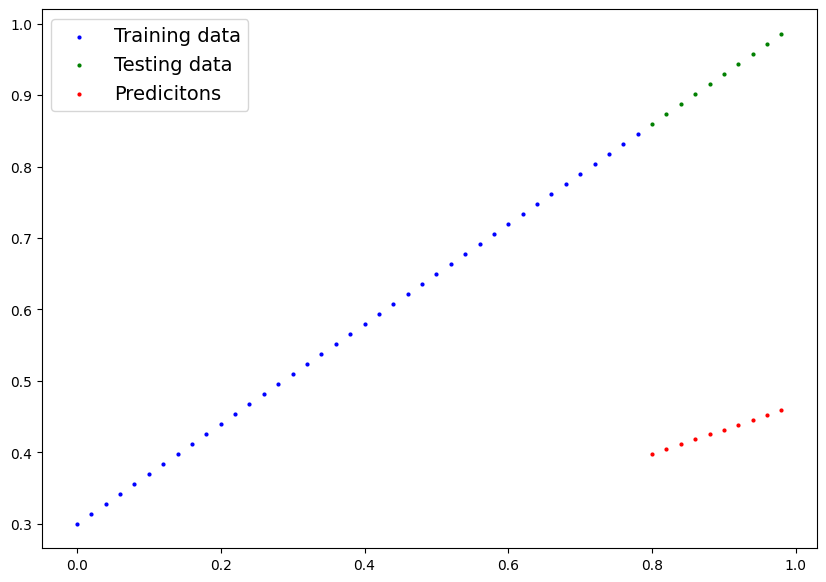

In [156]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameter (these may be random) to some known parameters.

Or in other words from a poor representation of data to a better representation of data.

One way to measure how poor or how wrong your models predicitons are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

And specifically in PyTorch, we need:
* A training loop
* A testing loop

In [157]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [158]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [159]:
# Setup a loss function
loss_fn = nn.L1Loss

# Setup an optimizer (stochastic gradient descent)
optimizer =  torch.optim.SGD(params = model_0.parameters(),
                             lr=0.01) # lr = learning rate = possibly the most important hyper parameter you can set

**Q:** Which loss function and optimizer should i use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop ( and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss ( compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

### Encountered a`RuntimeError: Boolean value of Tensor with more than one value is ambiguous` when calculating the loss using `L1Loss`.

Issues and Solutions:

1. Mismatched Tensor Shapes:

* Check and ensure that the shapes of y_pred and y_train are compatible for the loss calculation.

2. NaN or Inf Values:

* Ensure that there are no NaN or Inf values in y_pred or y_train, as they can cause issues during the loss calculation.

3. Loss Function Parameters:

* Make sure that the loss function (L1Loss in this case) is being used correctly. Some loss functions have specific requirements for input shapes or parameters.

4. Ambiguity in Boolean Tensor:

* Explicitly set the reduction parameter when initializing the L1Loss function. The use of size_average has been deprecated, and using reduction is preferred.


In [160]:
# Check shapes
print("Shape of y_pred:", y_pred.shape)
print("Shape of y_train:", y_train.shape)

# Check for NaN or Inf
print("NaN in y_pred:", torch.isnan(y_pred).any())
print("Inf in y_pred:", torch.isinf(y_pred).any())
print("NaN in y_train:", torch.isnan(y_train).any())
print("Inf in y_train:", torch.isinf(y_train).any())

# Print values for debugging
print("y_pred:", y_pred)
print("y_train:", y_train)

Shape of y_pred: torch.Size([40, 1])
Shape of y_train: torch.Size([40, 1])
NaN in y_pred: tensor(False)
Inf in y_pred: tensor(False)
NaN in y_train: tensor(False)
Inf in y_train: tensor(False)
y_pred: tensor([[0.3025],
        [0.3164],
        [0.3304],
        [0.3443],
        [0.3583],
        [0.3722],
        [0.3861],
        [0.4001],
        [0.4140],
        [0.4279],
        [0.4419],
        [0.4558],
        [0.4697],
        [0.4837],
        [0.4976],
        [0.5116],
        [0.5255],
        [0.5394],
        [0.5534],
        [0.5673],
        [0.5812],
        [0.5952],
        [0.6091],
        [0.6230],
        [0.6370],
        [0.6509],
        [0.6648],
        [0.6788],
        [0.6927],
        [0.7067],
        [0.7206],
        [0.7345],
        [0.7485],
        [0.7624],
        [0.7763],
        [0.7903],
        [0.8042],
        [0.8181],
        [0.8321],
        [0.8460]], grad_fn=<AddmmBackward0>)
y_train: tensor([[0.3000],
        [0.3140],
       

#### It appears that the issue is originating from the size_average and reduce parameters in the L1Loss initialization. The error is likely being triggered when these parameters are evaluated, and it's related to handling tensors with more than one value.

* To address this, you can explicitly set the values for size_average and reduce when initializing the L1Loss function. In PyTorch, size_average has been deprecated, and you can use reduction instead.

In [161]:
# Initialize L1Loss with reduction argument
loss_fn = torch.nn.L1Loss(reduction='mean')

# Calculate loss
loss = loss_fn(y_pred, y_train)

# Print loss as a scalar
print("Loss:", loss.item())

Loss: 0.0012645035749301314


In [162]:
# Setup an optimizer (stochastic gradient descent)  
# An epoch is one loop through the data...
epochs = 200

# Track different values 
epoch_count=[]
loss_values=[]
test_loss_values=[]


### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradient to require gradient

    # 1. Forward pass
    y_pred = model_0(X_train) # predict on the training data

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train) # calculate the loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate (add on top of each other), so we have to zero them in step 3 (optimizer.zero_grad())
    

    ### Testing 
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout, batchnorm etc.)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenecs
     with torch.no_grad(): # you may also see torch.no_grad in older PyTorch code
        #1. Do forward pass
        test_pred = model_0(X_test)

        #2. Calculate loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happenin
    if epoch % 10 == 0: 
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch} | Loss : {loss} | Test loss: {test_loss}')
         

    # Print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss : 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 10 | Loss : 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', ten

In [163]:
import numpy as np

In [164]:
loss_values, test_loss_values

([tensor(0.3129, grad_fn=<L1LossBackward0>),
  tensor(0.1977, grad_fn=<L1LossBackward0>),
  tensor(0.0891, grad_fn=<L1LossBackward0>),
  tensor(0.0531, grad_fn=<L1LossBackward0>),
  tensor(0.0454, grad_fn=<L1LossBackward0>),
  tensor(0.0417, grad_fn=<L1LossBackward0>),
  tensor(0.0382, grad_fn=<L1LossBackward0>),
  tensor(0.0348, grad_fn=<L1LossBackward0>),
  tensor(0.0313, grad_fn=<L1LossBackward0>),
  tensor(0.0279, grad_fn=<L1LossBackward0>),
  tensor(0.0245, grad_fn=<L1LossBackward0>),
  tensor(0.0210, grad_fn=<L1LossBackward0>),
  tensor(0.0176, grad_fn=<L1LossBackward0>),
  tensor(0.0142, grad_fn=<L1LossBackward0>),
  tensor(0.0107, grad_fn=<L1LossBackward0>),
  tensor(0.0073, grad_fn=<L1LossBackward0>),
  tensor(0.0039, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(

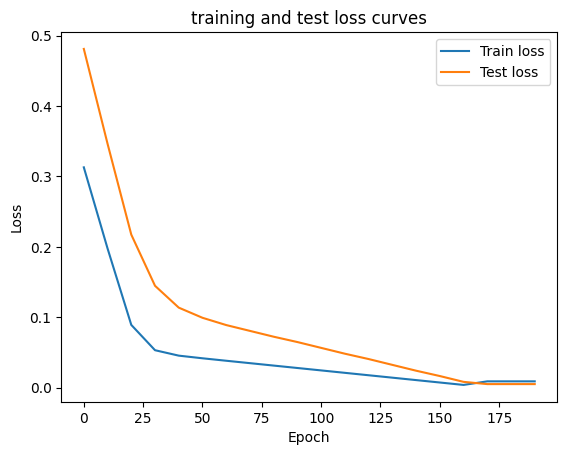

In [165]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [166]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [167]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [168]:
weight, bias

(0.7, 0.3)

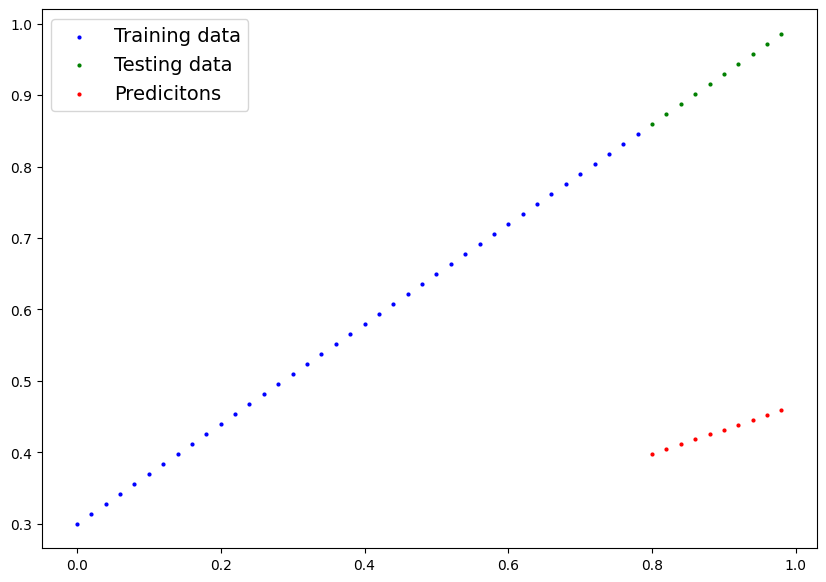

In [169]:
plot_predictions(predictions=y_preds)

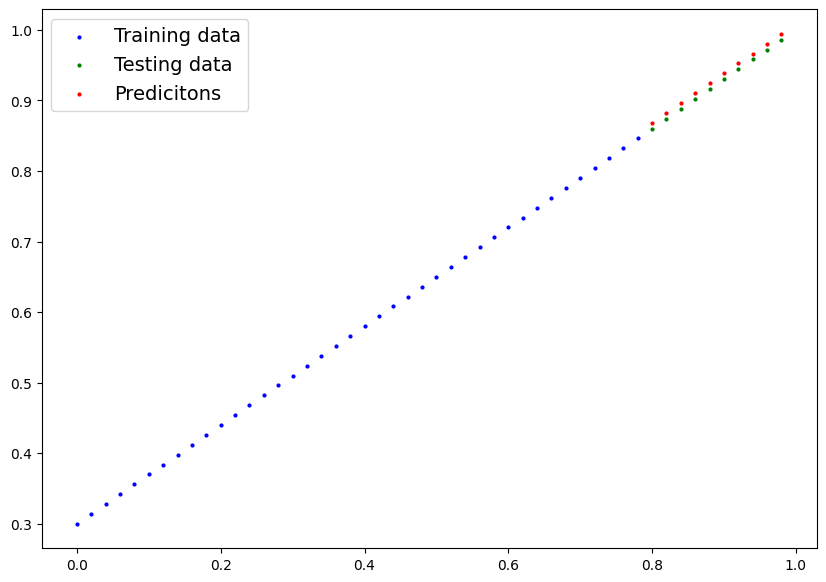

In [170]:
plot_predictions(predictions=y_preds_new)

### Saving a moel in PyTorch

There are three main methods you should know about for saving and loading in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in python's pickle format.

2. `torch.load()` - allows you to load a saved PyTorch object

3. `torch.nn.Module.load_state_dict()` - this allows to laod a model's saved dictionary.

Look into PyTorch's **Save and Load** in documentation

**PyTorch model extension - `.pt` or `.pth`**

In [171]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok= True)

# 2. Create a model save path
MODEL_NAME = '01_pytorch_workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow.pth


In [172]:
ls -l models

total 4
-rw-rw-rw- 1 codespace codespace 1063 Jan 11 11:42 01_pytorch_workflow.pth


## Loading a PyTorch model

since we saved our model's `state_dict()` rather the entire model, we'll create a new instacnce of our model class and load the saved `state_dict()` into that

In [173]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [174]:
# To load in a saved stte_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated paramaters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [175]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [176]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [177]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)




In [178]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. putting it all together

Let's go back through the steps above and see it all in one place.

In [179]:
# import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check pytorch version
print(torch.__version__)

1.12.1+cu102


Create device-agnostic code.

this means if we've got access to a gpu, our code will use it( for potentially faster computing)

If no GPU is available, the code will default to using CPU.

In [180]:
# Setup device agnoistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device : {device}")

using device : cpu


### 6.1 Data

In [181]:
# Create some data using the linear regression formula of y = weight * x + bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze we get a shape of (50,) but we want (50,1) therefore error will pop out.
y = weight * X + bias
X[:10],y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [182]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

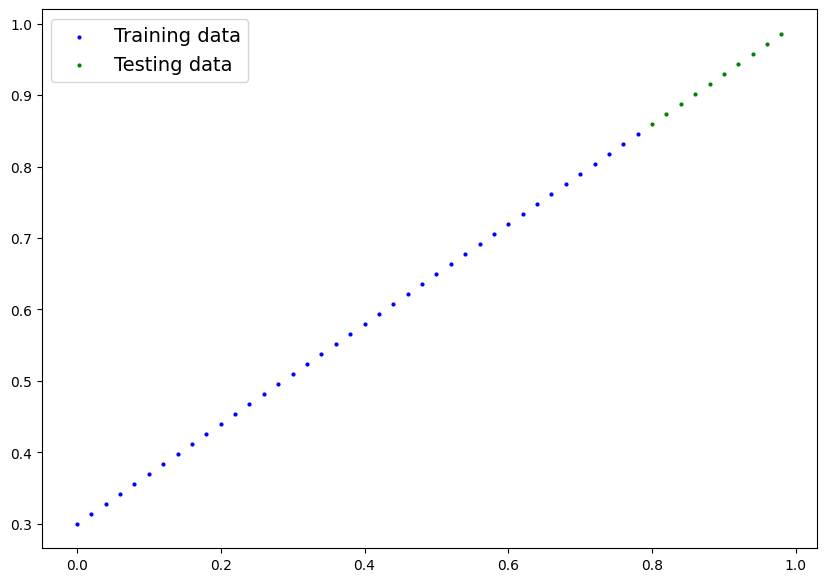

In [183]:
# Plot the data
# Note: if you don't have the plot_predictions() fucntion loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

In [184]:
# create a linear model by subclassing nn.Model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: linear tranform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [185]:
# set the model to use the target device
model_1 = model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* testing loop

In [186]:
# setup the loss function
loss_fn = nn.L1Loss() # same as MAE

# setup out optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

                            

In [187]:
# lets write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    # 1. forward pass
    y_pred = model_1(X_train)

    # 2. calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. zero the gradients
    optimizer.zero_grad()

    # 4. backward propagation
    loss.backward()

    # 5. step the optimizer
    optimizer.step()

    ### testing 
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    #print out whats happening
        
        if epoch % 10 == 0:
            print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ')

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089 
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963 
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085 
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062 
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949 
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003 
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355 
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053 
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495 
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703 
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249 
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866 
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904 
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.0

In [188]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [189]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions


In [192]:
# turn the model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

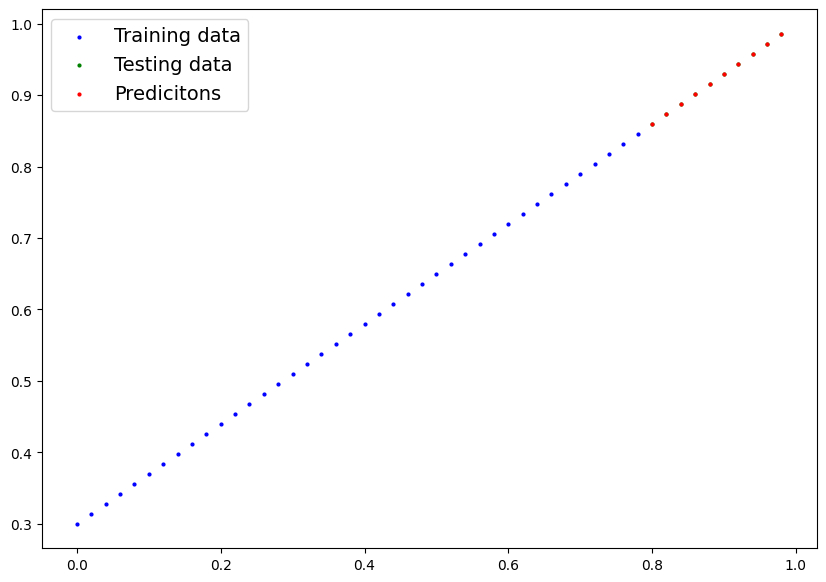

In [193]:
# Check out our mode predictions visually
plot_predictions(predictions = y_preds)

### 6.5 Saving and loading our model

In [196]:
from pathlib import Path
# 1. create the models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create a model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [197]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [198]:
# Load a PyTorch model

# 1. Create a new model instance
loaded_model_1 = LinearRegressionModelV2()

# 2. Load in the state dict of the old model
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# 3. Put the loaded model to device
loaded_model_1.to(device)



LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [199]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [200]:
loaded_model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [201]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exercises and Extra-curriculumn

For exercises & extra-curriculumn, refer to: https://www.learnpytorch.io/01_pytorch_workflow/#exercises